In [2]:
!pip3 install boxx > .null

In [ ]:
!pip3 install tensorflow --user

In [1]:
import pandas as pd
import numpy as np
import boxx
import json
import os
from shutil import copyfile
import random
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score

In [2]:
os.listdir('archive (1)/Data/')
    


['Canned', 'Non Canned', 'Test', 'Train']

No of canned images

In [3]:
print(len(os.listdir('archive (1)/Data/Canned/')))

1081


No of Non Canned Images

In [4]:
print(len(os.listdir('archive (1)/Data/Non Canned/')))

1255


In [5]:
def split_data(source, training, testing, split_size):
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(f'{filename} is corrupt or empty')
        
    training_length = int(len(files)* split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[training_length:]
    
    for filename in training_set:
        this_file = source + filename
        dest = training + filename
        copyfile(this_file, dest)
    
    for filename in testing_set:
        this_file = source + filename
        dest = testing + filename
        copyfile(this_file, dest)

In [6]:
canned_src_dir = 'archive (1)/Data/Canned/'
non_can_src_dir = 'archive (1)/Data/Non Canned/'
training_can_dir = 'archive (1)/Data/Train/can/'
training_non_dir = 'archive (1)/Data/Train/non-can/'
testing_can_dir = 'archive (1)/Data/Test/can/'
testing_non_dir = 'archive (1)/Data/Test/non-can/'

split_size = 0.9

split_data(canned_src_dir, training_can_dir, testing_can_dir, split_size)
split_data(non_can_src_dir, training_non_dir, testing_non_dir, split_size)

Visualizing training data

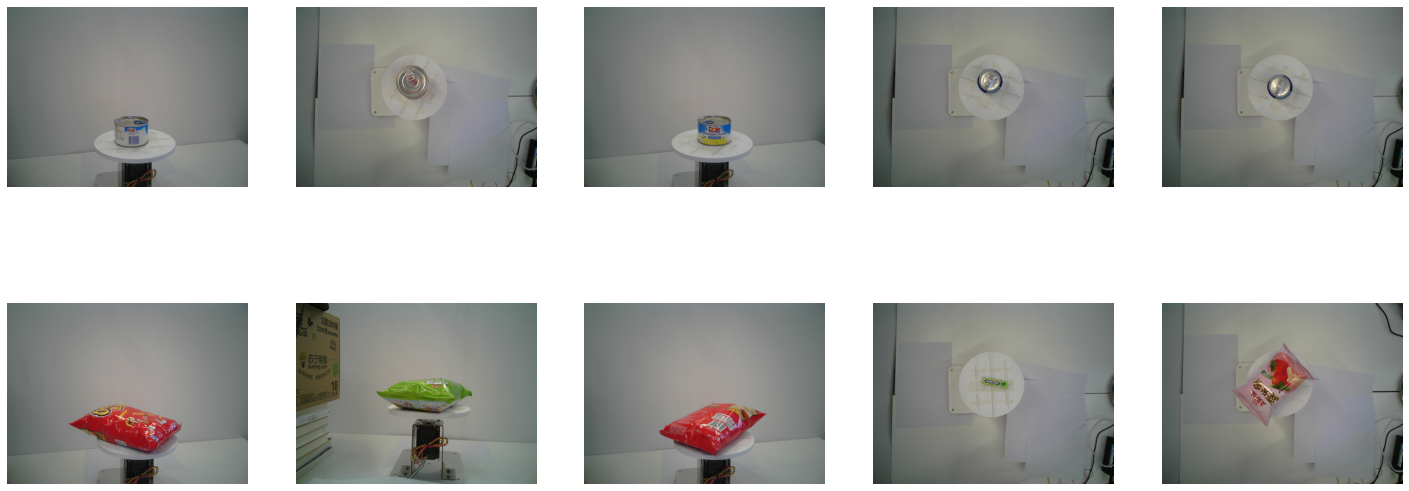

In [7]:
next_can_pic = [os.path.join(training_can_dir, fname) for fname in random.sample(os.listdir(training_can_dir), 5)]
next_non_pic = [os.path.join(training_non_dir, fname) for fname in random.sample(os.listdir(training_non_dir), 5)]

plt.figure(figsize=(25,10))
for i, img_path in enumerate(next_can_pic + next_non_pic):
    ax = plt.subplot(2, 5, i+1)
    ax.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img)

Converting Image Data into Arrays

In [8]:
X_train = []
y_train = []
X_test = []
y_test = []

In [10]:
def can_array_data(path):
    for p in os.listdir(path):
        category = 0
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_train.append(new_img_array)
        y_train.append(category)
        
def non_array_data(path):
    for p in os.listdir(path):
        category = 1
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_train.append(new_img_array)
        y_train.append(category)

In [11]:
can_array_data('archive (1)/Data/Train/can/')
non_array_data('archive (1)/Data/Train/non-can/')

In [9]:
X_train[]

IndexError: list index out of range

In [12]:
X_train = np.array(X_train).reshape(-1, 80,80,1)
y_train = np.array(y_train)

Normalize Data

In [13]:
X_train = X_train/255

In [15]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
58/58 [==============================] - 17s 283ms/step - loss: 0.6637 - accuracy: 0.6151 - val_loss: 0.9524 - val_accuracy: 0.4394
Epoch 2/10
58/58 [==============================] - 16s 276ms/step - loss: 0.3112 - accuracy: 0.8831 - val_loss: 0.1340 - val_accuracy: 0.9394
Epoch 3/10
58/58 [==============================] - 18s 307ms/step - loss: 0.1001 - accuracy: 0.9865 - val_loss: 0.0707 - val_accuracy: 0.9697
Epoch 4/10
58/58 [==============================] - 19s 332ms/step - loss: 0.0685 - accuracy: 0.9881 - val_loss: 0.0673 - val_accuracy: 0.9719
Epoch 5/10
58/58 [==============================] - 19s 333ms/step - loss: 0.0428 - accuracy: 0.9924 - val_loss: 0.0076 - val_accuracy: 0.9978
Epoch 6/10
58/58 [==============================] - 18s 317ms/step - loss: 0.0348 - accuracy: 0.9924 - val_loss: 0.0121 - val_accuracy: 0.9978
Epoch 7/10
58/58 [==============================] - 19s 331ms/step - loss: 0.0876 - accuracy: 0.9697 - val_loss: 0.0047 - val_accuracy: 0.9978

Converting test data into array

In [18]:
def can1_array_data(path):
    for p in os.listdir(path):
        category = 0
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
        y_test.append(category)
        
def non1_array_data(path):
    for p in os.listdir(path):
        category = 1
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
        y_test.append(category)

In [19]:
can1_array_data('archive (1)/Data/Test/can/')
non1_array_data('archive (1)/Data/Test/non-can/')

In [20]:
X_test = np.array(X_test).reshape(-1, 80,80,1)
y_test = np.array(y_test)

In [21]:
X_test = X_test/255

In [22]:
prediction = model.predict(X_test)

In [27]:
predicted_val = [int(round(p[0])) for p in prediction]

In [29]:
print("model accuracy score: ", accuracy_score(y_test, predicted_val))

model accuracy score:  1.0
